In [1]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        # サンプルと特徴量を抽出しておく
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        # 問題6
        # 1番古いSSE所得する
        old_sse = self.SSE(X)
        
        # 初期値をn_init分変更して、重心の変更を行う
        for i in range(self.n_init - 1):
            self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
            new_sse = self.center_distance_update(self, X) # 中でsseの計算が走る
             
            # SSEが最小の重心を保存する
            if new_sse < old_sse:
                old_sse = new_sse
                center_distance_mean(X)
                
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                 print()
    
    # 問題7
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        # SSEが最も小さい重心を保存しているので、直接ラベルが出力される関数を設定
        return self.min_distance_label(X)
    
    # 問題1 
    # クラスターの重心を決定する
    def center_distance_mean(self, X):
        # ②、③
        # 重心を保存する箱の生成
        center_distance = np.zeros((self.n_cluster,self.n_features))
        
        # 各クラスターの平均値計算し、保存する
        for i in range(self.n_cluster):
            cluster = X[self.label == i]
            self.myu[i] = np.mean(cluster, axis=0)
        return self.myu
    
    # 問題3 
    # 重心から全てのサンプルデータとの点を計算する
    def center_distance(self,X):
        distance = np.zeros((self.n_samples, self.n_cluster))

        # 重心から各点を引いて距離を求める
        for i in range(self.n_cluster):
            for j in range(self.n_samples):
                distance_error = self.center_distance_mean(X)[i] -  X[j]
                distance[j][i] = np.linalg.norm(distance_error) 
        return distance
    
    # 問題4 
    # 距離が最小となる重心のクラスターにラベルを振り分ける
    def min_distance_label(self, X):
        self.label = np.argmin(self.center_distance(X), axis=1)
    
    # 問題2 
    # SSEを計算する（行けそうな気もするので、これで一旦GO）
    def SSE(self,X):
        sse = np.sum(np.sum(self.center_distance(X), axis=0))
        return sse
    
    # 問題5
    # クラスターの重心移動を繰り返す
    def center_distance_update(self, X):
        for i in range(self.max_iter):
            old_myu = self.center_distance_mean(X) # 古い重心を求める
            self.center_distance# ③
            self.min_distance_label(X)# ④、⑤
            new_myu = self.center_distance_mean(X) # 新しい重心を求める
            
            # 古い重心と更新した重心が等しい場合、処理を終了する 
            if old_myu == new_myu or i == (self.max_iter -1): # ⑦
                self.SSE(X)
                break

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

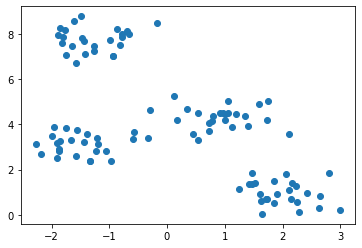

In [3]:
# 図の確認
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# 【問題1】中心点の初期値を決める
入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。
 


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。



In [4]:
# ラベルの所得
# ① 初期ラベルを割り当てる
label = np.random.randint(0,4, X.shape[0]) # 4はk個分
n_cluster = np.unique(label)
n_cluster = np.array(n_cluster)
print(label)
print(n_cluster) 

# ②、③　クラスタの生成と平均を求めて重心を決定する

def center_distance_mean(X):
    center_distance = np.zeros((4,2))
    for i in range(len(n_cluster)):
        cluster = X[label == i]
        center_distance[i] = np.mean(cluster, axis=0)
    return center_distance
center_distance_mean = center_distance_mean(X)
center_distance_mean

[2 2 0 3 0 0 2 2 1 3 3 1 2 3 1 0 3 2 1 0 3 1 2 1 0 2 1 3 2 2 2 1 0 2 1 0 1
 0 1 2 1 3 1 0 0 1 1 3 2 2 0 0 1 3 2 1 1 2 1 3 0 3 0 0 2 1 3 0 2 3 1 3 2 3
 1 0 0 0 0 1 1 3 3 2 3 3 2 3 2 0 1 1 3 0 3 0 0 1 2 3]
[0 1 2 3]


array([[ 0.49159891,  3.44827792],
       [-0.39377855,  4.98815947],
       [ 0.3436994 ,  3.45204079],
       [-0.23551055,  4.18944889]])

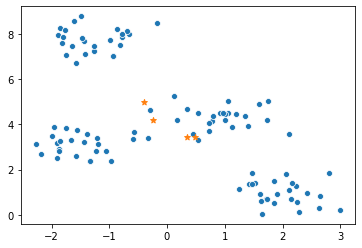

In [5]:
sns.scatterplot(X[:, 0], X[:, 1])
plt.scatter(center_distance_mean[:, 0], center_distance_mean[:, 1], marker='*')

plt.show()

# 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。



In [6]:
n_cluster = np.unique(label)
n_cluster = len(n_cluster)
X2 = np.concatenate([X, label[:, np.newaxis]], axis=1)

# SSEを計算する 
n_cluster = np.unique(label)
n_cluster = len(n_cluster)

def SSE(X):
    sse= np.sum(np.sum(norms(X), axis=0))
    return sse

#SSE(X)


# 【問題3】クラスタへの割り当て
【問題3】クラスタへの割り当て
全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

$$
∥
q
−
p
∥
=
√
(
q
−
p
)
⋅
(
q
−
p
)
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [7]:


n_cluster = np.unique(label)
n_cluster = len(n_cluster)

# 出力される距離が、Xのサンプル数分*k個分欲しいので箱を作成する

def norms(X):
    norm = np.zeros((X.shape[0], n_cluster))
# 重心から各点を引いて距離を求める
    for i in range(n_cluster):
        for j in range(X.shape[0]):
            norm_error = center_distance_mean(X)[i] -  X[j]
            norm[j][i] = np.linalg.norm(norm_error) 
    return norm

#norms(X)
#norm.shape

# 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。



In [8]:
def min_distance_label(X):
        label = np.argmin(norms(X), axis=1)
        return label
    
#min_distance_label(X)

# 【問題5】繰り返し

クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

In [9]:
def center_distance_update(self, X):
        for i in range(self.max_iter):
            old_myu = self.center_distance_mean(X) # 古い重心を求める
            self.center_distance# ③
            self.min_distance_label(X)# ④、⑤
            new_myu = self.center_distance_mean(X) # 新しい重心を求める
            
            # 古い重心と更新した重心が等しい場合、処理を終了する 
            if old_myu == new_myu or i == (self.max_iter -1): # ⑦
                self.SSE(X)
                break

# 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

In [10]:
def fit(X):
    # 問題6
    # 1番古いSSE所得する
    old_sse = self.SSE(X)
        
        # 初期値をn_init分変更して、重心の変更を行う
    for i in range(self.n_init - 1):
        self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
        new_sse = self.center_distance_update(self, X) # 中でsseの計算が走る
             
            # SSEが最小の重心を保存する
        if new_sse < old_sse:
            old_sse = new_sse
            center_distance_mean(X)

# 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。



データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

In [11]:
def predict(self, X):
    """
        入力されたデータがどのクラスタに属するかを計算
    """
    # SSEが最も小さい重心を保存しているので、直接ラベルが出力される関数を設定
    return self.min_distance_label(X)

# 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [12]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
        
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        # サンプルと特徴量を抽出しておく
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        # 問題6
        # 1番古いSSE所得する
        self.old_sse = self.SSE(X)
        #print(old_sse)
        
        # 初期値をn_init分変更して、重心の変更を行う
        for i in range(self.n_init - 1):
            self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
            new_sse = self.center_distance_update(X) # 中でsseの計算が走る
            print(new_sse)
            
            # SSEが最小の重心を保存する
            if new_sse < self.old_sse:
                self.old_sse = new_sse
                self.center_distance_mean(X) # SSEが最小の重心を所得する
                
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                 print()
    
    # 問題7
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        # SSEが最も小さい重心を保存しているので、直接ラベルが出力される関数を設定
        return self.min_distance_label(X)
    
    # 問題1 
    # クラスターの重心を決定する
    def center_distance_mean(self, X):
        
        # 重心を保存する箱の生成
        myu = np.zeros((self.n_clusters,self.n_features))
        
        # 各クラスターの平均値計算し、保存する
        for i in range(self.n_clusters):
            cluster = X[self.label == i]
            myu[i] = np.mean(cluster, axis=0)
        return myu
    
    # 問題3 
    # 重心から全てのサンプルデータとの点を計算する
    def center_distance(self,X):
        distance = np.zeros((self.n_samples, self.n_clusters))

        # 重心から各点を引いて距離を求める
        for i in range(self.n_clusters):
            for j in range(self.n_samples):
                distance_error = self.center_distance_mean(X)[i] -  X[j]
                distance[j][i] = np.linalg.norm(distance_error) 
        return distance
    
    # 問題4 
    # 距離が最小となる重心のクラスターにラベルを振り分ける
    def min_distance_label(self, X):
        self.label = np.argmin(self.center_distance(X), axis=1)
        return self.label
    
    # 問題2 
    # SSEを計算する（行けそうな気もするので、これで一旦GO）
    def SSE(self,X):
        self.sse = 0
        for i in range(self.n_samples):
            for j in range(self.n_clusters):
                self.sse += np.linalg.norm(self.center_distance_mean(X)[j] -  X[i]) **2
        return self.sse
    
    # 問題5
    # クラスターの重心移動を繰り返す
    def center_distance_update(self, X):
        
        for i in range(self.max_iter):
            old_myu = self.center_distance_mean(X) # 古い重心を求める
            self.center_distance(X)# ③
            self.min_distance_label(X)# ④、⑤
            new_myu = self.center_distance_mean(X) # 新しい重心を求める
            
            # 古い重心と更新した重心が等しい場合、処理を終了する 
            if np.all(old_myu == new_myu) or i == (self.max_iter -1): # ⑦
                return self.SSE(X)
                break

In [13]:
model = ScratchKMeans(n_clusters=4, n_init=10, max_iter=20, tol=None, verbose=False)
model.fit(X)

6767.554305456084
6767.554305456083
6767.554305456084
6767.554305456084
6767.554305456083


/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


nan
6767.554305456083
6767.554305456083
6767.554305456083


In [14]:
model.SSE(X)

6767.554305456083

In [15]:
pred = model.predict(X)
pred

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

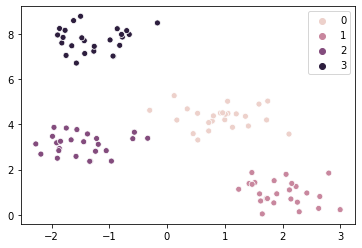

In [16]:
# まず図を可視化
sns.scatterplot(X[:, 0], X[:, 1], hue=pred)
plt.show()

# 処理は正しいっぽい

In [17]:
# returnの関係でfor分が止まってしまうため、力技
sse_list = []
model = ScratchKMeans(n_clusters=1, n_init=10, max_iter=20, tol=None, verbose=False)
model.fit(X)
sse_list.append(model.SSE(X))

model = ScratchKMeans(n_clusters=2, n_init=10, max_iter=20, tol=None, verbose=False)
model.fit(X)
sse_list.append(model.SSE(X))

model = ScratchKMeans(n_clusters=3, n_init=10, max_iter=20, tol=None, verbose=False)
model.fit(X)
sse_list.append(model.SSE(X))

model = ScratchKMeans(n_clusters=4, n_init=10, max_iter=20, tol=None, verbose=False)
model.fit(X)
sse_list.append(model.SSE(X))



870.2611797855423
870.2611797855423
870.2611797855423
870.2611797855423
870.2611797855423
870.2611797855423
870.2611797855423
870.2611797855423
870.2611797855423
3469.780530018712
3469.780530018712
3469.780530018712
3469.780530018712
3469.780530018712
3469.780530018712
3469.780530018712
3469.780530018712
3469.780530018712
5514.587306178052
5514.587306178053
5514.587306178053
4873.118423366137
5514.587306178052
5514.587306178054
5514.587306178054
4876.074393790377
5514.587306178053
6767.554305456083
6767.554305456083
6767.554305456083
6767.554305456084
6767.554305456084
6767.554305456084
6767.554305456083
6767.554305456083
6767.554305456084


In [18]:
sse_list

[870.2611797855423, 3469.780530018712, 5514.587306178053, 6767.554305456084]

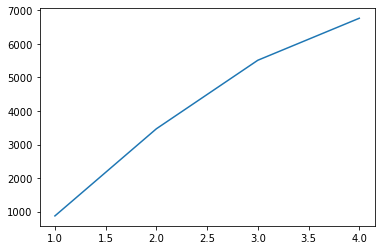

In [19]:
# エルボー法可視化
plt.plot(np.arange(1, n_cluster+1), sse_list)
plt.show()

# 増加しているのは謎。。。
# fitの中のfor文の必要性の有無,SSEの式を修正しても解決せず。
# 式は正しいはずなので、更新に難あり？？

# 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [20]:
import pandas as pd
dir_path = '/Users/yuki.tatsuoka/Downloads/'
df = pd.read_csv(dir_path + 'Wholesale customers data.csv')

df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [21]:
# 	Channel	Regionを除去
data = df.drop(['Channel','Region'], axis=1)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
pca_data = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


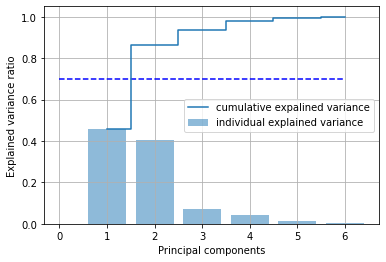

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()

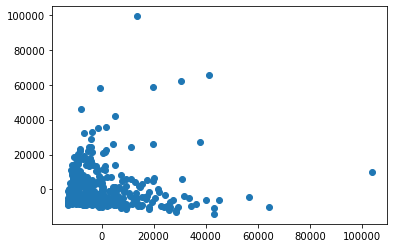

In [24]:
# 図
plt.scatter(pca_data[:, 0], pca_data[:, 1])

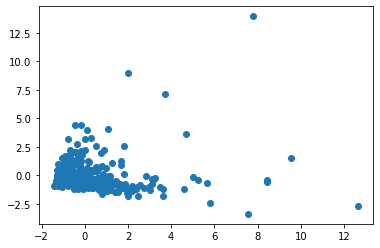

In [25]:
# 標準化→PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit_transform(data)

pca.fit(scaler)
pca_data2 = pca.transform(scaler)

plt.scatter(pca_data2[:, 0], pca_data2[:, 1])
# 標準化した方がデータが密集している？？
# また、点の位置が全然異なる

In [26]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
        
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        # サンプルと特徴量を抽出しておく
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        # 問題6
        # 1番古いSSE所得する
        #self.old_sse = self.SSE(X)
        #print(old_sse)
        
        # 初期値をn_init分変更して、重心の変更を行う
        for i in range(self.n_init - 1):
            self.label = np.random.randint(0,self.n_clusters, X.shape[0]) 
            new_sse = self.center_distance_update(X) # 中でsseの計算が走る
            #print(new_sse)
            
            # SSEが最小の重心を保存する
           # if new_sse < self.old_sse:
               # self.old_sse = new_sse
                #self.center_distance_mean(X) # SSEが最小の重心を所得する
                
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                 print()
    
    # 問題7
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        # SSEが最も小さい重心を保存しているので、直接ラベルが出力される関数を設定
        return self.min_distance_label(X)
    
    # 問題1 
    # クラスターの重心を決定する
    def center_distance_mean(self, X):
        
        # 重心を保存する箱の生成
        myu = np.zeros((self.n_clusters,self.n_features))
        
        # 各クラスターの平均値計算し、保存する
        for i in range(self.n_clusters):
            cluster = X[self.label == i]
            myu[i] = np.mean(cluster, axis=0)
        return myu
    
    # 問題3 
    # 重心から全てのサンプルデータとの点を計算する
    def center_distance(self,X):
        distance = np.zeros((self.n_samples, self.n_clusters))

        # 重心から各点を引いて距離を求める
        for i in range(self.n_clusters):
            for j in range(self.n_samples):
                distance_error = self.center_distance_mean(X)[i] -  X[j]
                distance[j][i] = np.linalg.norm(distance_error) 
        return distance
    
    # 問題4 
    # 距離が最小となる重心のクラスターにラベルを振り分ける
    def min_distance_label(self, X):
        self.label = np.argmin(self.center_distance(X), axis=1)
        return self.label
    
    # 問題2 
    # SSEを計算する（行けそうな気もするので、これで一旦GO）
    def SSE(self,X):
        self.sse = 0
        for i in range(self.n_samples):
            for j in range(self.n_clusters):
                self.sse += np.linalg.norm(self.center_distance_mean(X)[j] -  X[i]) **2
        return self.sse
    
    # 問題5
    # クラスターの重心移動を繰り返す
    def center_distance_update(self, X):
        
        for i in range(self.max_iter):
            old_myu = self.center_distance_mean(X) # 古い重心を求める
            self.center_distance(X)# ③
            self.min_distance_label(X)# ④、⑤
            new_myu = self.center_distance_mean(X) # 新しい重心を求める
            
            # 古い重心と更新した重心が等しい場合、処理を終了する 
            if np.all(old_myu == new_myu) or i == (self.max_iter -1): # ⑦
                return self.SSE(X)
                break

In [27]:
label = np.random.randint(0,4, 440) 

In [28]:
# 結論、6個で分割
model = ScratchKMeans(n_clusters=6, n_init=5, max_iter=10, tol=None, verbose=False)
model.fit(pca_data2)

In [29]:
pred = model.predict(pca_data2)
pred

array([4, 4, 4, 2, 4, 4, 2, 4, 2, 0, 0, 2, 4, 4, 4, 2, 0, 4, 4, 2, 4, 2,
       3, 1, 4, 4, 2, 2, 0, 3, 4, 2, 2, 3, 2, 0, 4, 0, 0, 3, 3, 4, 0, 0,
       4, 0, 0, 5, 4, 0, 2, 2, 3, 0, 3, 2, 5, 0, 2, 2, 2, 5, 2, 0, 2, 5,
       2, 4, 2, 2, 3, 4, 2, 3, 4, 2, 2, 0, 2, 2, 2, 0, 4, 2, 2, 5, 5, 3,
       2, 4, 2, 2, 5, 3, 0, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 2, 0, 0, 2, 0,
       2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 4, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 3, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 4, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       3, 4, 2, 2, 4, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 3, 3, 0,
       2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 5, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 3, 3, 4,
       2, 4, 4, 0, 2, 2, 2, 2, 2, 5, 2, 4, 4, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       0, 0, 0, 4, 0, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 4, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 4,

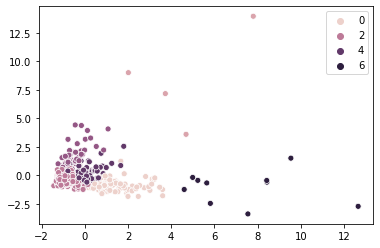

In [30]:
sns.scatterplot(pca_data2[:, 0], pca_data2[:,1], hue=model.label)

# データの特徴量が6つだったため、PCAで次元を圧縮している分、６特徴量分のlabelと推測した

# 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [31]:
dir_path = '/Users/yuki.tatsuoka/Downloads/'
df = pd.read_csv(dir_path + 'Wholesale customers data.csv')

channel = df["Channel"]
region = df["Region"]

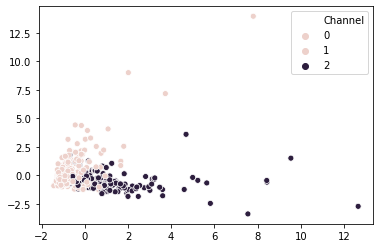

In [32]:
# Channelで可視化
sns.scatterplot(pca_data2[:, 0], pca_data2[:,1], hue=channel)
plt.show()

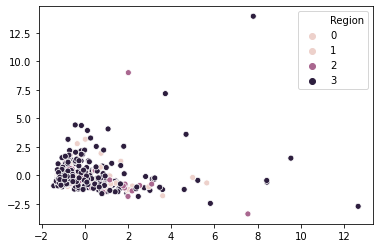

In [33]:
# Regionで可視化
sns.scatterplot(pca_data2[:, 0], pca_data2[:,1], hue=region)

In [34]:
# ここでは、クラスタを３つに設定し直し可視化する
model = ScratchKMeans(n_clusters=3, n_init=5, max_iter=10, tol=None, verbose=False)
model.fit(pca_data2)

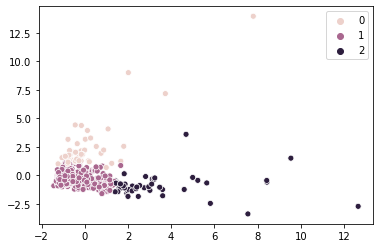

In [35]:
sns.scatterplot(pca_data2[:, 0], pca_data2[:,1], hue=model.label)

#### 考察
#### [前提]0,1はset_paletteで色を変更できなかったため、混ざっていないことを前提とする
Channelでは、１と２が綺麗に分割されているのでkmeansのように綺麗に分割されている可能性が高い
一方で、Regionでは、データが複雑に混ざっているため、kmeansのような手法では上手く分割する事ができていない
kmeansはChannelを分割するには向いていると言える


# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。

In [36]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Figure size 1080x504 with 0 Axes>

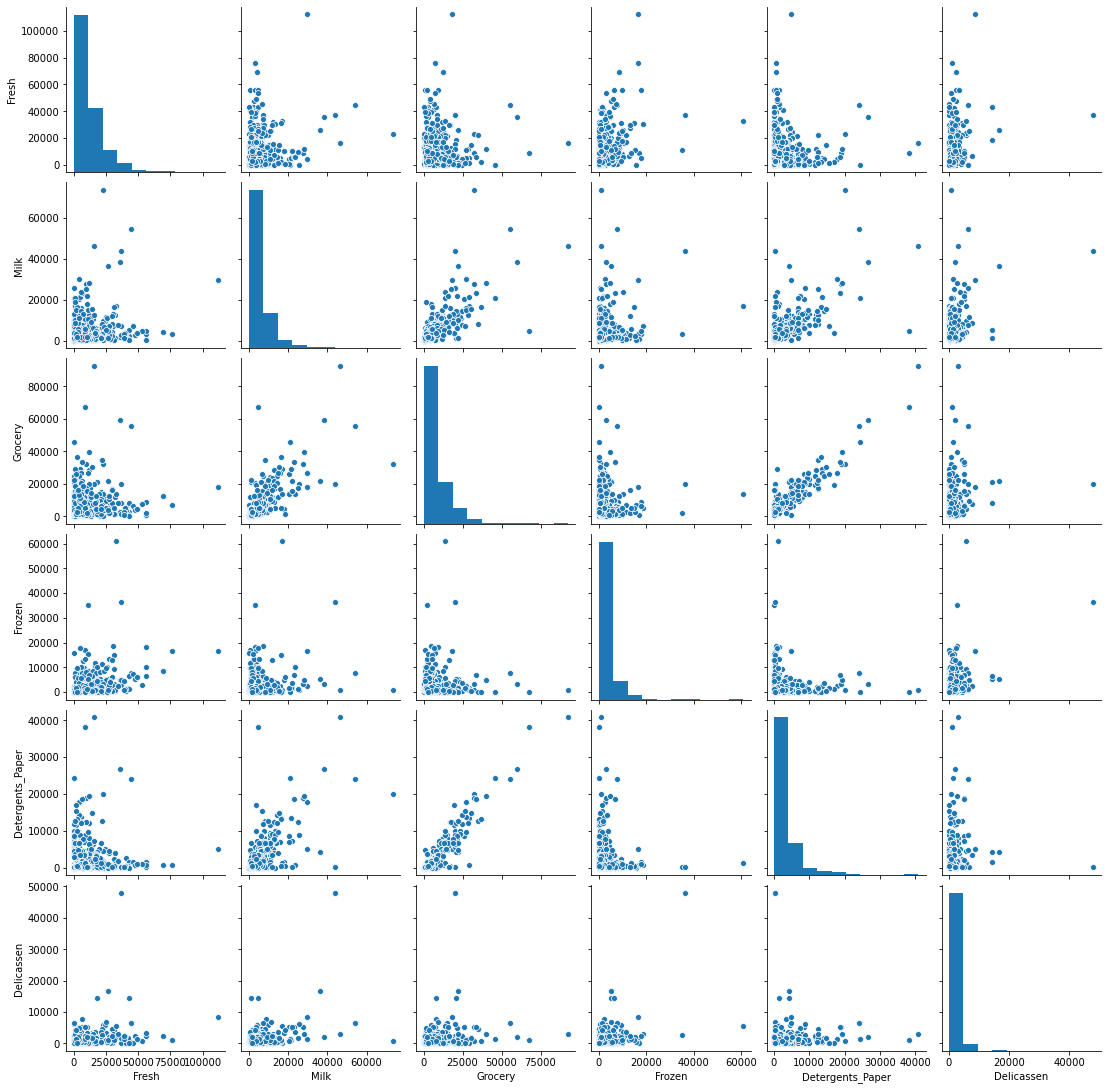

In [50]:
plt.figure(figsize=(15,7))
sns.pairplot(data)
plt.show()

In [ ]:
# 食料品の消費量と洗剤および紙製品の年間支出が比例の関係
# 牛乳と食料品の消費量が比例の関係
# 他はなさそう
# 

In [51]:
df.groupby(['Region']).mean()

# 地域によって、生鮮食品、生活用品、冷凍食品の消費量が異なる
# 地域別にマーケティングができる

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [55]:
df.groupby(['Channel']).mean()

#1ホテル/２レストラン
# こちらも顕著に利用している製品が異なる
# 何を経営しているのかによって、提供する商品が異なるので、ホテルやレストランが周りにどれくらいあるのかでゴンドラの調整が可能

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [58]:
# Milk、Grocery、FrozenでPCA
df2 = df.drop(["Grocery", "Detergents_Paper", "Delicassen", "Channel","Region"], axis=1)

In [59]:
df2

,Fresh,Milk,Frozen
0,12669,9656,214
1,7057,9810,1762
2,6353,8808,2405
3,13265,1196,6404
4,22615,5410,3915
...,...,...,...
435,29703,12051,13135
436,39228,1431,4510
437,14531,15488,437
438,10290,1981,1038


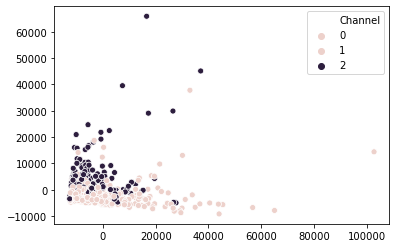

In [63]:
pca = PCA(n_components=2).fit_transform(df2)

# channelで確認
sns.scatterplot(pca[:, 0], pca[:, 1], hue=channel)
#　こちらは1,2の方向が逆に変化した
# とはいえ、これが何を示しているのか判断できない

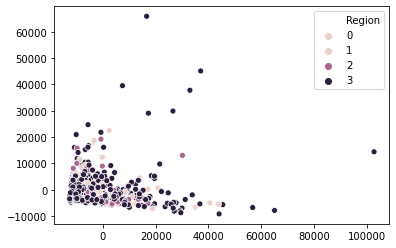

In [64]:
# regionで確認
sns.scatterplot(pca[:, 0], pca[:, 1], hue=region)
#こちらは特徴量を絞っても変化なし

In [66]:
model = ScratchKMeans(n_clusters=3, n_init=5, max_iter=10, tol=None, verbose=False)
model.fit(pca)

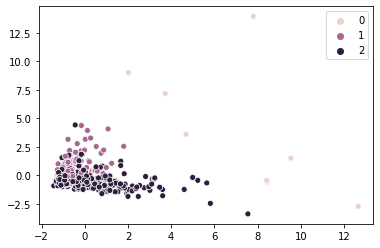

In [67]:
# Kmeansで確認
sns.scatterplot(pca_data2[:, 0], pca_data2[:,1], hue=model.label)

# Kmeansと、他のplotでは全くラベルが異なる。
# この場合は、Kmeansでは結果が判明しない

In [68]:
# 結論
# gropbyによって発見した情報や、散布図の情報がマーケティングに有効
# kmeansやPCAでは有効的な効果は得られそうになかった
# ひとまず、ここで終了するが、継続的にPCAを使って検証を行う